# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 64

In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'png'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 20000 images belonging to 1 classes.


In [5]:
x_train[0][0][0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

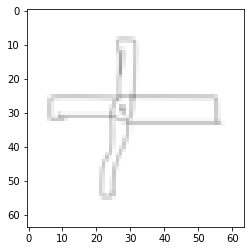

In [6]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [7]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [IMAGE_SIZE,IMAGE_SIZE*2,IMAGE_SIZE*4,IMAGE_SIZE*8]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, IMAGE_SIZE*8)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [IMAGE_SIZE*4,IMAGE_SIZE*2,IMAGE_SIZE,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [9]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024

## training

In [10]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 100
N_CRITIC = 5

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

0 (5, 1) [D loss: (-12.9)(R -18.1, F -0.0, G 0.5)] [G loss: 0.3]
1 (5, 1) [D loss: (-275.7)(R -482.3, F 0.1, G 20.7)] [G loss: -2.0]
2 (5, 1) [D loss: (-346.2)(R -603.8, F 0.5, G 25.7)] [G loss: -19.3]
3 (5, 1) [D loss: (-354.2)(R -625.5, F -0.1, G 27.1)] [G loss: -36.3]
4 (5, 1) [D loss: (-358.2)(R -614.5, F -0.0, G 25.6)] [G loss: -55.5]
5 (5, 1) [D loss: (-366.6)(R -638.8, F -4.6, G 27.7)] [G loss: -55.8]
6 (5, 1) [D loss: (-312.2)(R -891.7, F 11.3, G 56.8)] [G loss: -115.1]
7 (5, 1) [D loss: (-370.1)(R -669.0, F 15.0, G 28.4)] [G loss: -124.9]
8 (5, 1) [D loss: (-361.3)(R -649.6, F 18.3, G 27.0)] [G loss: -135.5]
9 (5, 1) [D loss: (-360.1)(R -637.7, F 24.9, G 25.3)] [G loss: -153.3]
10 (5, 1) [D loss: (-353.3)(R -646.3, F 35.6, G 25.7)] [G loss: -168.4]
11 (5, 1) [D loss: (-342.8)(R -621.4, F 45.5, G 23.3)] [G loss: -188.0]
12 (5, 1) [D loss: (-330.0)(R -623.8, F 60.4, G 23.3)] [G loss: -197.7]
13 (5, 1) [D loss: (-315.2)(R -612.6, F 75.3, G 22.2)] [G loss: -208.6]
14 (5, 1) [D los

111 (5, 1) [D loss: (-12.1)(R -151.2, F 134.7, G 0.4)] [G loss: -114.4]
112 (5, 1) [D loss: (-12.7)(R -141.4, F 126.2, G 0.3)] [G loss: -133.5]
113 (5, 1) [D loss: (-12.5)(R -125.3, F 110.8, G 0.2)] [G loss: -118.6]
114 (5, 1) [D loss: (-12.6)(R -119.0, F 104.9, G 0.2)] [G loss: -132.0]
115 (5, 1) [D loss: (-12.1)(R -143.1, F 128.8, G 0.2)] [G loss: -125.8]
116 (5, 1) [D loss: (-12.4)(R -138.1, F 123.6, G 0.2)] [G loss: -133.0]
117 (5, 1) [D loss: (-11.5)(R -130.8, F 117.5, G 0.2)] [G loss: -126.6]
118 (5, 1) [D loss: (-11.3)(R -131.6, F 118.3, G 0.2)] [G loss: -121.3]
119 (5, 1) [D loss: (-11.7)(R -135.2, F 121.5, G 0.2)] [G loss: -136.7]
120 (5, 1) [D loss: (-11.9)(R -131.3, F 117.1, G 0.2)] [G loss: -118.0]
121 (5, 1) [D loss: (-12.2)(R -135.8, F 121.0, G 0.3)] [G loss: -119.5]
122 (5, 1) [D loss: (-12.5)(R -145.1, F 129.1, G 0.3)] [G loss: -123.2]
123 (5, 1) [D loss: (-12.1)(R -113.3, F 99.3, G 0.2)] [G loss: -109.4]
124 (5, 1) [D loss: (-12.0)(R -139.1, F 124.6, G 0.3)] [G loss: -

228 (5, 1) [D loss: (-9.9)(R -97.3, F 84.6, G 0.3)] [G loss: -70.2]
229 (5, 1) [D loss: (-10.3)(R -91.2, F 79.1, G 0.2)] [G loss: -70.5]
230 (5, 1) [D loss: (-10.2)(R -81.7, F 69.9, G 0.2)] [G loss: -73.3]
231 (5, 1) [D loss: (-9.8)(R -94.4, F 82.3, G 0.2)] [G loss: -84.6]
232 (5, 1) [D loss: (-9.5)(R -79.7, F 67.6, G 0.3)] [G loss: -60.3]
233 (5, 1) [D loss: (-9.9)(R -54.9, F 43.3, G 0.2)] [G loss: -52.4]
234 (5, 1) [D loss: (-10.6)(R -101.7, F 89.1, G 0.2)] [G loss: -83.3]
235 (5, 1) [D loss: (-10.1)(R -73.9, F 62.0, G 0.2)] [G loss: -77.1]
236 (5, 1) [D loss: (-9.2)(R -72.4, F 61.6, G 0.2)] [G loss: -67.9]
237 (5, 1) [D loss: (-9.7)(R -60.8, F 48.9, G 0.2)] [G loss: -48.4]
238 (5, 1) [D loss: (-10.0)(R -92.5, F 80.8, G 0.2)] [G loss: -87.4]
239 (5, 1) [D loss: (-10.0)(R -92.6, F 80.5, G 0.2)] [G loss: -82.7]


In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 13000)
# plt.ylim(0, 2)

plt.show()
